# CRISP DM

In [ ]:
Bussines Understanding

- Problem
Pada saat Covid-19, banyak aktivitas yang harus dilakukan secara online, termasuk sekolah. Sekolah
online dilakukan dengan menggunakan apklikasi seperti zoom, gmeet, dan lain sebagainya. Namun dalam
belajar online banyak pelajar yang mengeluhkan cara belajar secara online dikarenakan sulit untuk
memahami apa yang disampaikan oleh guru atau dosen. Dataset ini berisi data siswa yang melakukan
pembelajaran online.

- Tujuan
Dataset ini diambil dari Kaggle (https://www.kaggle.com/code/georgyzubkov/students-adaptability-eda-and-mini-ml)
bertujuan untuk menganalisis dan mengklasifikasi pelajar apakah mereka mampu beradaptasi dalam belajar
online atau tidak. Jika banyak pelajar yang tidak bisa beradaptasi dalam pembelajaran online,
maka ini akan menjadi evaluasi oleh pihak terkait.

In [ ]:
Data Understanding

Berikut atribut-atribut dari dataset ini :

0. Gender = jenis kelamin pelajar
1. Age = usia pelajar
2. Education_Level = jenjang pendidikan
3. Institution_Type = tipe institusi apakah negeri atau swasta
4. IT_Student = apakah pelajar merupakan pelajar IT atau bukan
5. Location = apakah lokasi institusi di kota atau bukan
6. Load_shedding = Tingkat jam pelajaran (sks) apakah tinggi atau rendah
7. Financial_Condition = kondisi finansial keluarga
8. Internet_Type = tipe internet yang digunakan apakah melalui data seluler atau wifi
9. Network_Type = jaringan yang digunakan (2G, 3G, 4G)
10. Class_Duration = durasi kelas dalam sehari
11. Self_Lms = apakah institusi memiliki LMS atau tidak
12. Device = perangkat yang digunakan oleh pelajar
13. Adaptivity_Level = tingkat adapatasi pelajar terhadap belajar online

LMS atau Learning Management System adalah program perangkat lunak berbasis web untuk manajemen,
dokumentasi, pemantauan, pelaporan, administrasi dan distribusi konten pendidikan, program pelatihan,
manual teknis, video instruksional atau bahan perpustakaan digital, dan proyek pembelajaran
dan pengembangan.

In [ ]:
Data Preparation

Yang menjadi fitur dalam dataset ini adalah:
1. Education_Level
2. Institution_Type
3. IT_Student
4. Location
5. Load_shedding
6. Financial_Condition
7. Internet_Type
8. Network_Type
9. Class_Duration
10. Self_Lms
12. Device

Sedangkan, yang menjadi target adalah Adaptivity_Level

# Import library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("students_adaptability_level_online_education.csv")

In [3]:
df.head()

,Gender,Age,Education_Level,Institution_Type,IT_Student,Location,Load_shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_Lms,Device,Adaptivity_Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education_Level      1205 non-null   object
 3   Institution_Type     1205 non-null   object
 4   IT_Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load_shedding        1205 non-null   object
 7   Financial_Condition  1205 non-null   object
 8   Internet_Type        1205 non-null   object
 9   Network_Type         1205 non-null   object
 10  Class_Duration       1205 non-null   object
 11  Self_Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity_Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


# Transformasi Data

In [5]:
# memisahkan numerik dan kategori
numerik = []
kategori = []

for col in df.columns:
    if df[col].dtype == 'int64':
        numerik.append(col)
    else:
        kategori.append(col)

for col in df.columns:
    if col in numerik:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [6]:
numerik

[]

In [7]:
kategori

['Gender',
 'Age',
 'Education_Level',
 'Institution_Type',
 'IT_Student',
 'Location',
 'Load_shedding',
 'Financial_Condition',
 'Internet_Type',
 'Network_Type',
 'Class_Duration',
 'Self_Lms',
 'Device',
 'Adaptivity_Level']

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in kategori:
    df[col] = le.fit_transform(df[col])

In [9]:
df.head()

,Gender,Age,Education_Level,Institution_Type,IT_Student,Location,Load_shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_Lms,Device,Adaptivity_Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1


In [10]:
df.to_csv('belajar_online.csv')

# Visualisasi Data

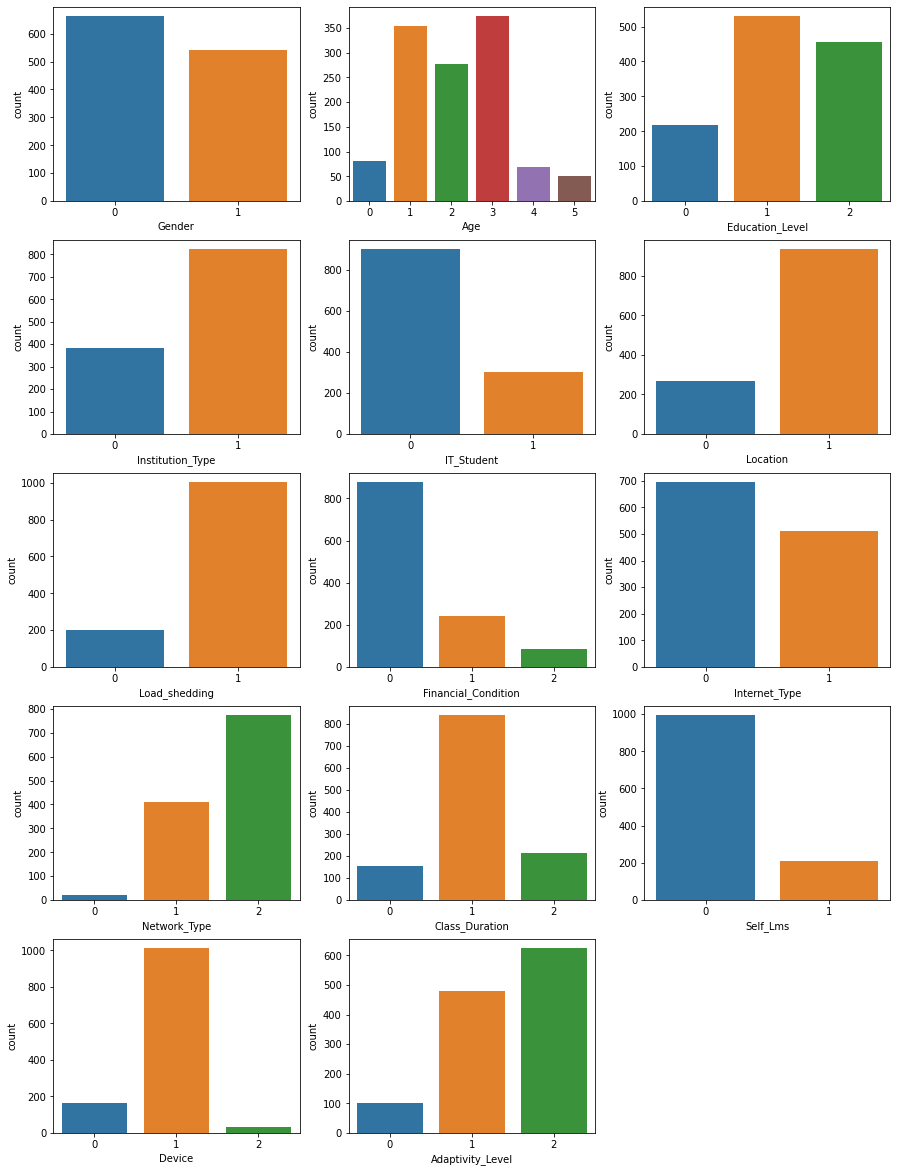

In [11]:
import seaborn as sns

i = 1
plt.figure(figsize = (15,25))
for feature in df:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = df)
    i +=1

# Split data

In [12]:
X = df.drop(columns=['Adaptivity_Level', 'Gender', 'Age'], axis=1)
Y = df['Adaptivity_Level']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [14]:
print(X.shape, x_train.shape, x_test.shape)

(1205, 11) (964, 11) (241, 11)


# Modeling

### Membuat model training

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [16]:
model = knn.fit(x_train, y_train)

# Evaluation

### Evaluasi model

In [17]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [18]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.8257261410788381


In [19]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [20]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.7510373443983402


# Model Prediksi

In [21]:
input_data = (1,1,0,1,1,2,1,2,1,0,1)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
prediksi = model.predict(data_reshaped)
print(prediksi)

if (prediksi[0] == 0):
    print('Pelajar Sangat Bisa Beradaptasi Dalam Belajar Online')
if (prediksi == 1):
    print('Pelajar Tidak Bisa Beradaptasi Dalam Belajar Online')
else:
    print('Pelajar Bisa Beradaptasi Dalam Belajar Online')

[2]
Pelajar Bisa Beradaptasi Dalam Belajar Online


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Deployment

### Save Model

In [22]:
import pickle

filename = 'student.sav'
pickle.dump(model, open(filename, 'wb'))